# Visualising Gaia Data with Matplotlib and Seaborn

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Danselem/brics_astro/blob/main/Week3/02_gaia_plot.ipynb)

<div style="text-align: center;">
  <img src="https://cdn.mos.cms.futurecdn.net/LDoGBYsFY4y9rx3qBjkSLS.png" width="800"/>
</div>

This notebook will guide you through creating basic plots using a sample of data from the Gaia space mission. Gaia is mapping the positions, motions, and properties of billions of stars. We'll use Matplotlib and Seaborn to visualise some of this data.

For more on Gaia, check out the project page: <https://www.esa.int/Science_Exploration/Space_Science/Gaia>.

**Note**
If you are running this jupyter notebook from Colab, then run the next cell by pressing `SHIFT+ENTER` to install the required packages for this notebook. Otherwise, skip the next cell.

In [ ]:
!pip install numpy pandas matplotlib scipy statsmodels

### Step 1: Import Libraries

First, we need to import the necessary Python libraries.

In [1]:
# importing python packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Step 2: Load the Data

Load the `gaia.csv` data into a Pandas DataFrame.


In [19]:
df = pd.read_csv('data/gaia.csv')

# If you are using Google Colab, uncomment the next line:
# df = pd.read_csv("https://raw.githubusercontent.com/Danselem/brics_astro/main/Week3/data/gaia.csv")

Let's inspect the first few rows of the DataFrame to understand the data.

In [20]:
df.head()

source_id          ra        dec       pmra      pmdec  parallax  \
0  3586362911238437248  171.809877 -12.086810  80.773084  31.038119  7.191948   
1  6084196726724370560  202.890673 -46.281027  12.731613   2.493211  2.821713   
2  2499641245098603648   37.350369  -1.647166  -5.752432 -30.534618  2.098506   
3  5214925720023958912  117.438720 -74.058326 -12.103186   5.926152  2.347004   
4  6511230039178478848  335.331638 -51.731239  -0.236398  -2.922207  2.620485   

   parallax_over_error  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
0           319.736180        13.987773         14.809981         12.990531   
1            30.065174        11.581702         11.823022         11.032214   
2            82.557220        14.687146         15.298927         13.930087   
3            27.595547        17.950108         19.436530         16.751095   
4            25.010994        17.788868         19.338089         16.609950   

      bp_rp        mg  
0  1.819450  8.272006  
1  0.790808  3.834267  
2  1.368840  6.296697  
3  2.685434  9.802677  
4  2.728140  9.880776

### Step 3: Basic Scatter Plot (RA vs. Dec)

Let's create a scatter plot of Right Ascension (RA) vs. Declination (Dec) to visualise the distribution of stars on the sky.

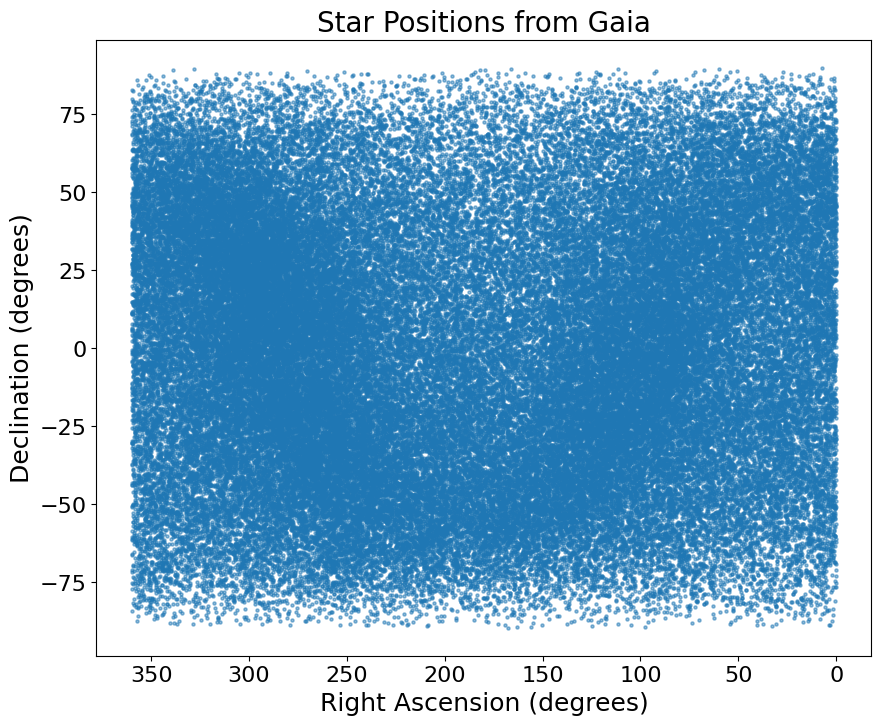

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(df['ra'], df['dec'], s=5, alpha=0.5) # s controls marker size, alpha controls transparency
plt.xlabel('Right Ascension (degrees)', fontsize=18)
plt.ylabel('Declination (degrees)', fontsize=18)
plt.title('Star Positions from Gaia', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.gca().invert_xaxis()  # RA increases to the left
plt.show()

### Step 4: Scatter Plot with Magnitude as Color

We can add more information to the scatter plot by using the `phot_g_mean_mag` column to color the points. This shows the brightness of the stars.

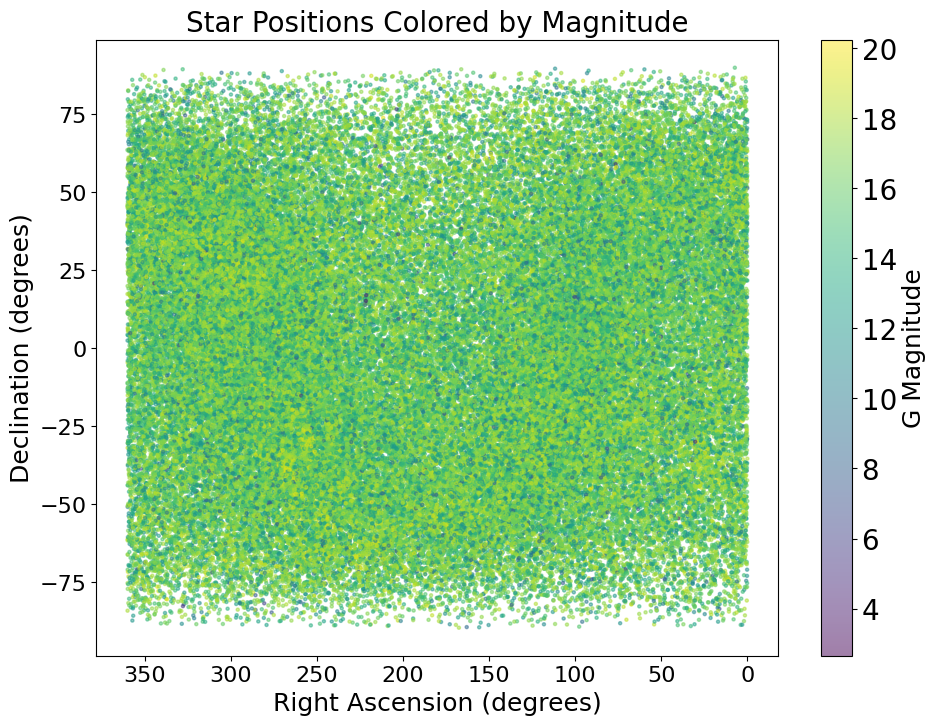

In [23]:
plt.figure(figsize=(11, 8))
sc = plt.scatter(df['ra'], df['dec'], c=df['phot_g_mean_mag'], cmap='viridis', s=5, alpha=0.5)

plt.xlabel('Right Ascension (degrees)', fontsize=18)
plt.ylabel('Declination (degrees)', fontsize=18)
plt.title('Star Positions Colored by Magnitude', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.gca().invert_xaxis()

cbar = plt.colorbar(sc)
cbar.set_label('G Magnitude', fontsize=18)   # Explicit label and size
cbar.ax.tick_params(labelsize=20)            # Tick label size

plt.show()

### Step 5: Histogram of Magnitudes

A histogram shows the distribution of a single variable. Let's plot a histogram of the G magnitudes.

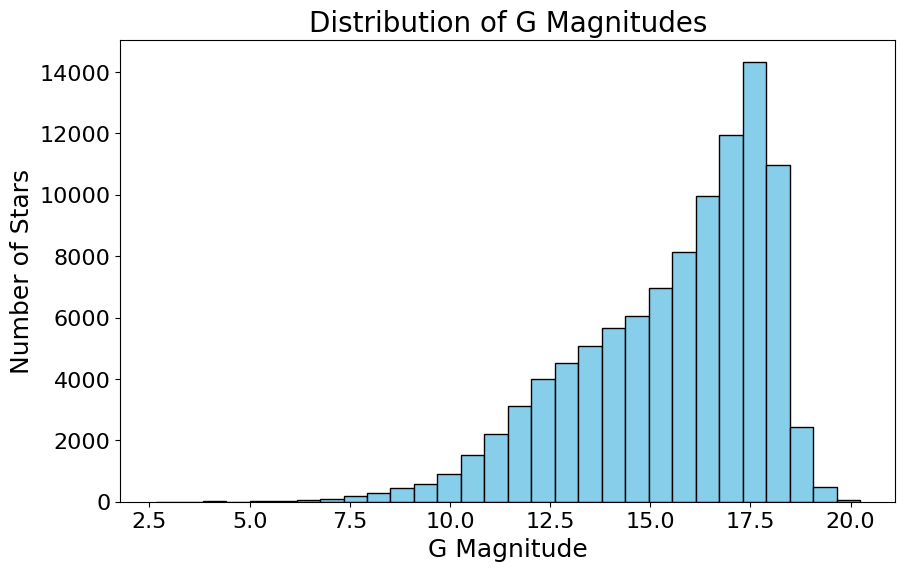

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['phot_g_mean_mag'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('G Magnitude', fontsize=18)
plt.ylabel('Number of Stars', fontsize=18)
plt.title('Distribution of G Magnitudes', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.show()

We can compute the tangential velocity (how fast the star is moving across the sky) from proper motion and distance (derived from parallax).

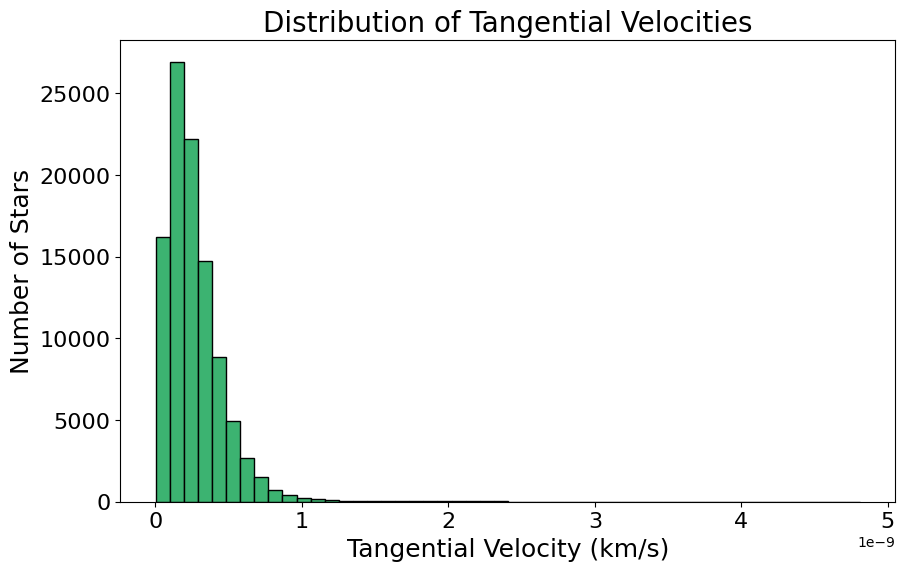

In [25]:
# Constants
pc_to_km = 3.086e13  # parsec in km
yr_to_sec = 3.154e7   # year in seconds
au_to_km = 1.496e8  # au in km

#Calculate distance in parsecs
df['distance'] = 1/df['parallax']

# Convert proper motions from mas/yr to rad/sec
df['pmra_rad_sec'] = df['pmra'] / (1000 * 3600 * 180 / np.pi * yr_to_sec)
df['pmdec_rad_sec'] = df['pmdec'] / (1000 * 3600 * 180 / np.pi * yr_to_sec)

# Calculate tangential velocities in km/s
df['vt_ra'] = df['distance'] * pc_to_km * df['pmra_rad_sec'] / au_to_km
df['vt_dec'] = df['distance'] * pc_to_km * df['pmdec_rad_sec'] / au_to_km

#Total tangential velocity
df['vt'] = np.sqrt(df['vt_ra']**2 + df['vt_dec']**2)

# Plot tangential velocity distribution
plt.figure(figsize=(10, 6))
plt.hist(df['vt'], bins=50, color='mediumseagreen', edgecolor='black')
plt.xlabel('Tangential Velocity (km/s)', fontsize=18)
plt.ylabel('Number of Stars', fontsize=18)
plt.title('Distribution of Tangential Velocities', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
#plt.xlim(0,100)
plt.show()

This gives you a sense of the distribution of stellar speeds. Very high tangential velocities can indicate halo stars or other populations with different kinematics.

### Step 6: Using Seaborn for a Scatter Plot

Seaborn can make more visually appealing plots with less code. Let's recreate the RA vs. Dec scatter plot using Seaborn.

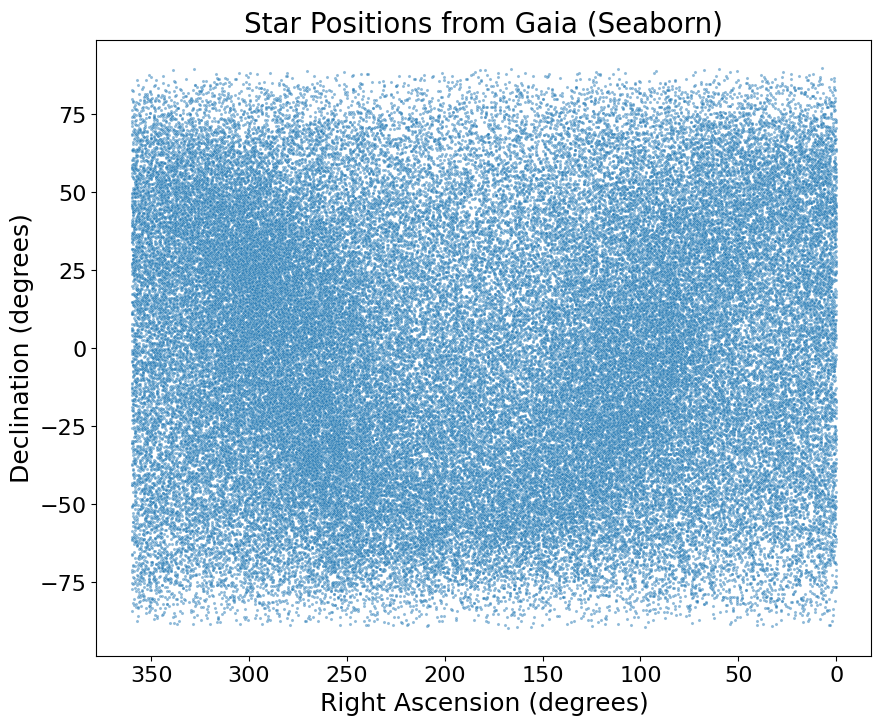

In [26]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ra', y='dec', data=df, s=5, alpha=0.5)
plt.xlabel('Right Ascension (degrees)', fontsize=18)
plt.ylabel('Declination (degrees)', fontsize=18)
plt.title('Star Positions from Gaia (Seaborn)', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.gca().invert_xaxis()
plt.show()

### Step 7: Seaborn with Magnitude as Hue

We can use the `hue` parameter in Seaborn to color the points by magnitude, similar to what we did with Matplotlib.

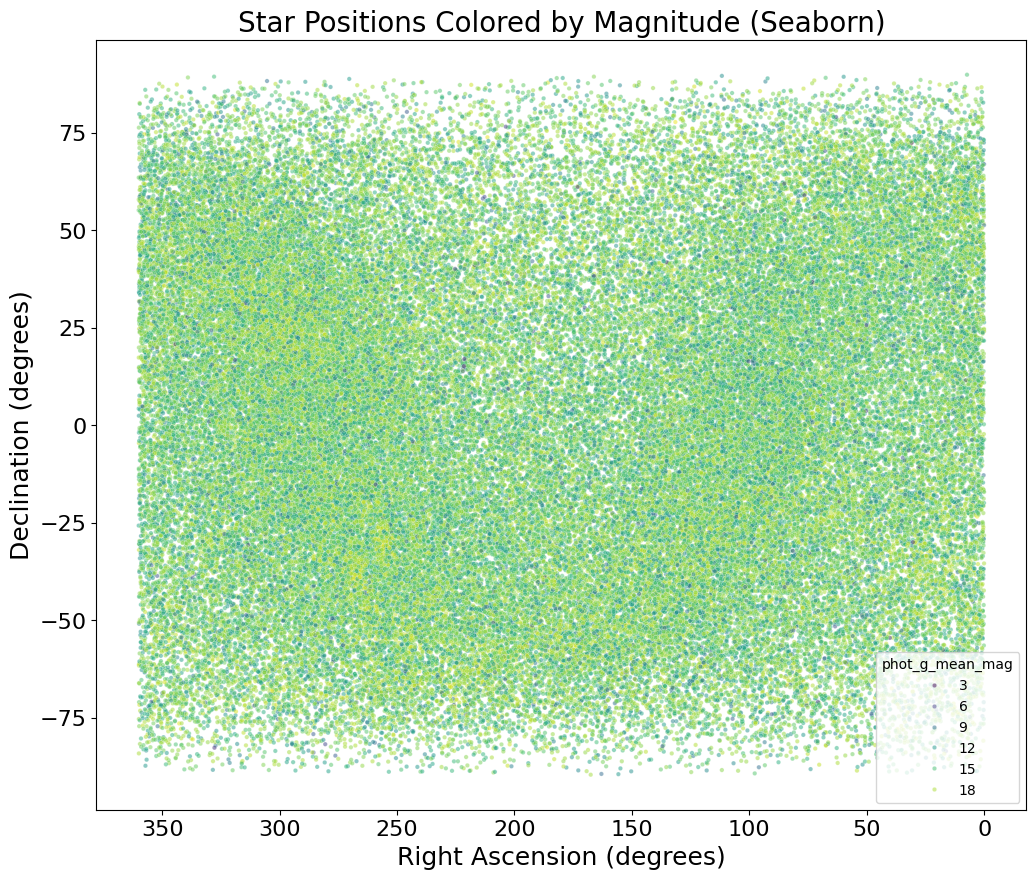

In [27]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='ra', y='dec', hue='phot_g_mean_mag', data=df, s=10, alpha=0.5, palette='viridis')
plt.xlabel('Right Ascension (degrees)', fontsize=18)
plt.ylabel('Declination (degrees)', fontsize=18)
plt.title('Star Positions Colored by Magnitude (Seaborn)', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.gca().invert_xaxis()
plt.show()

This plot shows arrows indicating the direction and magnitude of the proper motions of the stars.


## Hertzsprung-Russell (HR) Diagram
The HR diagram is a fundamental tool in astronomy. We'll approximate it by plotting absolute magnitude vs. color. First, we need to calculate absolute magnitude. This requires the parallax.

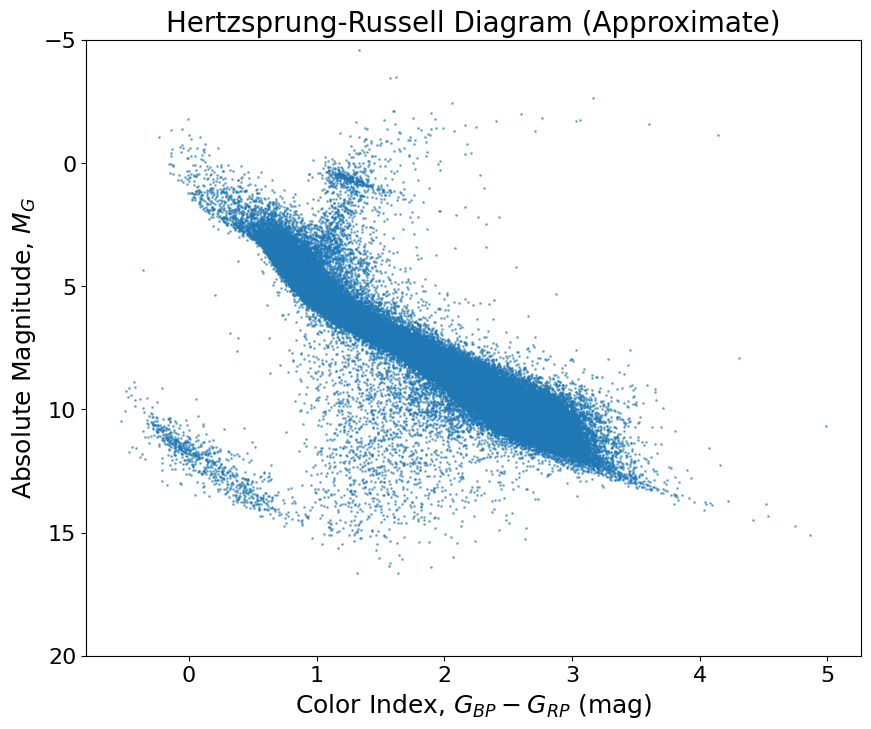

In [30]:
# Remove stars with parallax <= 0
df = df[df['parallax'] > 0]

# Calculate absolute magnitude
df['abs_mag'] = df['phot_g_mean_mag'] + 5 * np.log10(df['parallax']/100)

# Create a color index (approximation, needs better photometry for real science)
df['color_index'] = df['bp_rp']

# Scatter plot of HR diagram
plt.figure(figsize=(10, 8))
plt.scatter(df['color_index'], df['abs_mag'], s=1, alpha=0.5)
plt.xlabel(r'Color Index, $G_{BP} - G_{RP}$ (mag)', fontsize=18)
plt.ylabel(r'Absolute Magnitude, $M_G$', fontsize=18)
plt.title('Hertzsprung-Russell Diagram (Approximate)', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.ylim(20, -5)  # Invert y axis to match convention
plt.show()

A proper HR diagram needs a good color index. With better photometric data (like BP and RP magnitudes from Gaia), you could compute BP-RP and use that as the color. Absolute magnitude is calculated using the distance modulus formula, which relies on the parallax.




### Conclusion

This tutorial provides a basic introduction to visualising astronomical data using Matplotlib and Seaborn with real Gaia data. Remember to explore the documentation for both libraries to learn more about their capabilities and customisation options.


### **Exercises**

1. **Star Position Analysis**  
   Create a scatter plot of Right Ascension (RA) vs. Declination (Dec) for all stars, colored by their `phot_g_mean_mag`. Add a colorbar and ensure the RA axis is inverted.  
   *Deliverable*: Plot + 1-sentence explanation of why brighter stars (lower magnitudes) might cluster in certain regions.

2. **Magnitude Distribution**  
   Plot a histogram of `phot_g_mean_mag` with 20 bins.  
   *Deliverable*: Plot + Answer: "How does the distribution reflect observational limitations of telescopes?"

3. **Tangential Velocity**  
   Calculate tangential velocities using:  
   $$ v_t \, (\text{km/s}) = 4.74 \times \text{distance (pc)} \times \sqrt{\mu_\alpha^2 + \mu_\delta^2} $$  
   where $$\mu_\alpha = \text{pmra}/1000$$ and $$\mu_\delta = \text{pmdec}/1000$$ (mas/yr to arcsec/yr).  
   *Deliverable*: Code snippet + Histogram of calculated velocities.

4. **Hertzsprung-Russell Diagram**  
   Plot `phot_g_mean_mag` vs. `parallax`.  
   *Deliverable*: Plot + Identify which quadrant likely contains giant stars and why.

5. **Proper Motion Analysis**  
   Create a vector field plot for 200 randomly selected stars, scaling `pmra` and `pmdec` by 20x for visibility.  
   *Deliverable*: Plot + Note any patterns in motion directions.

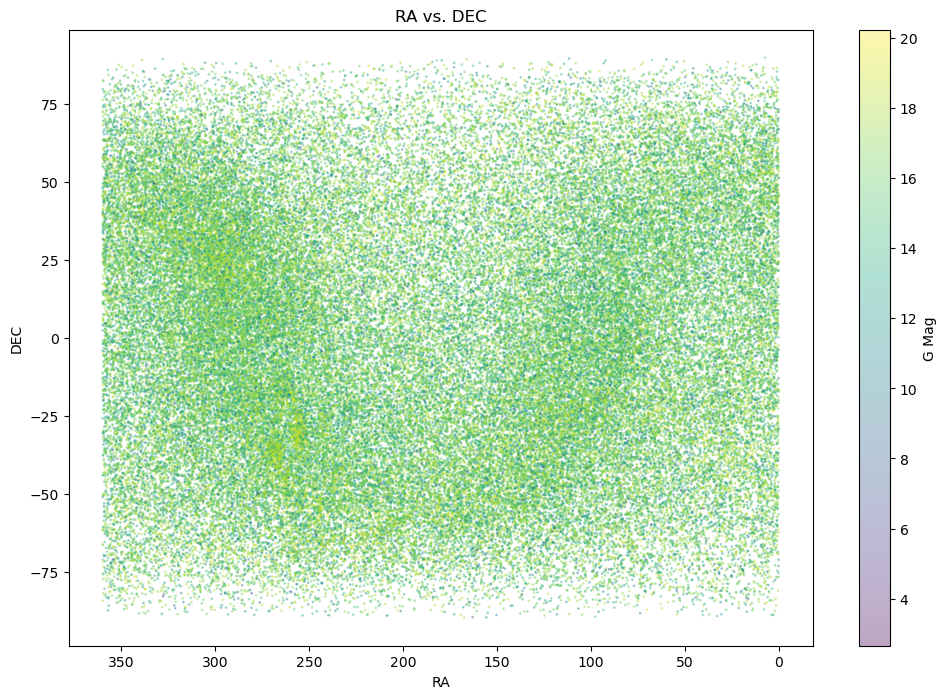

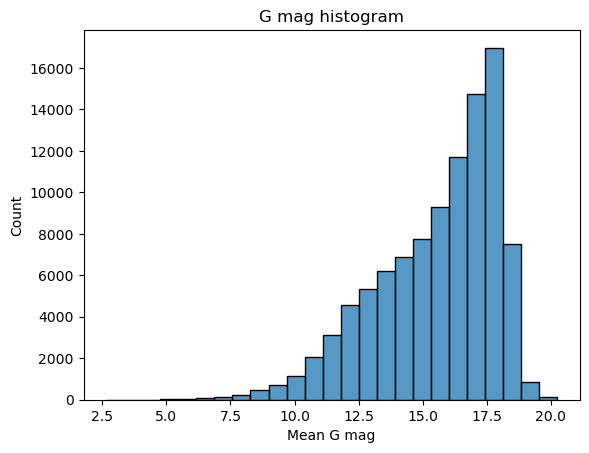

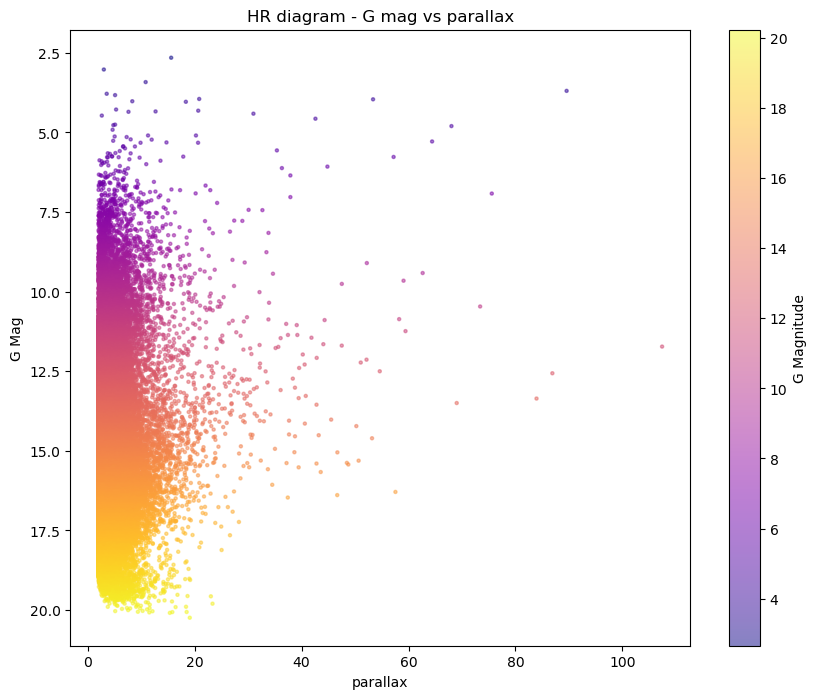

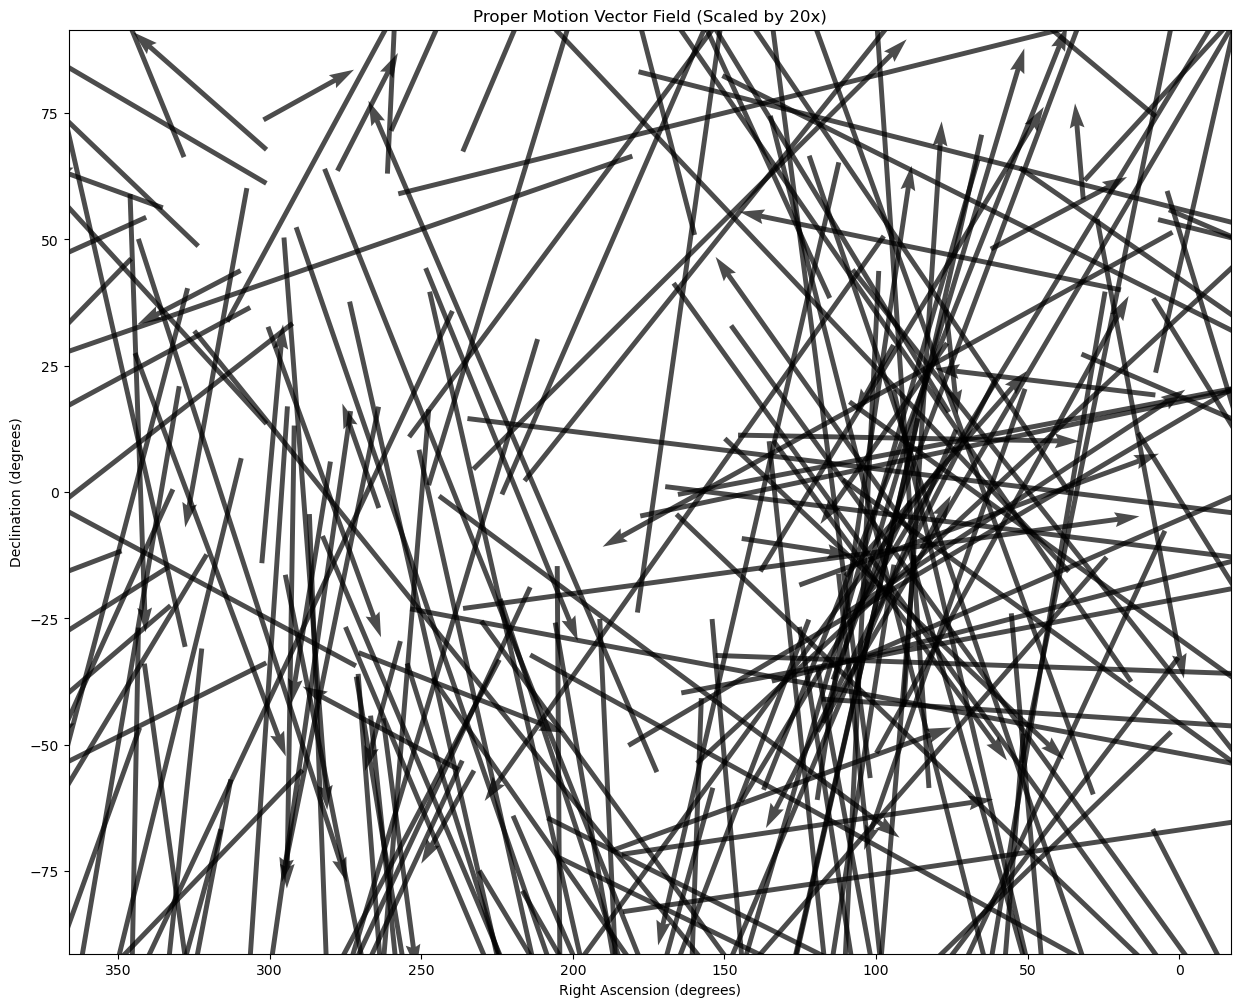

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('data/gaia.csv')
#1
plt.subplots(figsize=(12,8))
plot=plt.scatter(data['ra'], data['dec'], c=data['phot_g_mean_mag'], cmap='viridis', s=1, alpha=0.35)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('RA vs. DEC')
plt.gca().invert_xaxis()
cbar = plt.colorbar(plot)
cbar.set_label('G Mag')
plt.show()
print('\n')
#2
sns.histplot(data['phot_g_mean_mag'], bins=25, edgecolor='black')
plt.xlabel('Mean G mag')
plt.ylabel('Count')
plt.title('G mag histogram')
plt.show()
print('\n')
#3
import numpy as np 
data['distance']=1000/data['parallax']
pmra=data['pmra']/1000
pmdec=data['pmdec']/1000
data['v_tang']=4.74*data['distance']*np.sqrt(pmra**2+pmdec**2)
data.head()
print('\n')
#4
plt.subplots(figsize=(10,8))
plt.scatter(data['parallax'], data['phot_g_mean_mag'], s=5, alpha=0.5,c=data['phot_g_mean_mag'], cmap='plasma')
plt.xlabel('parallax')
plt.ylabel('G Mag')
plt.title('HR diagram - G mag vs parallax')
plt.colorbar(label='G Magnitude')
plt.gca().invert_yaxis()
plt.show()
print('\n')
#5
sample = data.sample(200, random_state=60)
pmra_scaled = sample['pmra'] * 20
pmdec_scaled = sample['pmdec'] * 20
plt.figure(figsize=(15, 12))
plt.quiver(sample['ra'], sample['dec'], pmra_scaled, pmdec_scaled, angles='xy', scale_units='xy', scale=2, alpha=0.7)
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('Proper Motion Vector Field (Scaled by 20x)')
plt.gca().invert_xaxis()
plt.show()